# 2110203 COMP ENG MATH II (CEDT) -- Stats Homework I

**Instructions**:
- Only ASSIGNMENT 1 and 2 will be graded. The rest are for your practise.
- Submit as PDF file. You can create PDF file using File -> Print from the Google Colab menu.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, random

np.random.seed(1)  # For reproducibility

## Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions. You may implement them yourself or use the provided distribution from `scipy.stats`.

In [2]:
from scipy.stats import norm, bernoulli, binom, uniform, geom, expon

# Sample from Uniform(a, b)
def sample_uniform(sample_size, a, b):
  # [YOUR CODE HERE]
  dist = uniform(a, b)
  return dist.rvs(sample_size)

def sample_normal(sample_size, mu, sigma):
  # [YOUR CODE HERE]
  dist = norm(mu, sigma)
  return dist.rvs(sample_size)

def sample_bernoulli(sample_size, p):
  # [YOUR CODE HERE]
  dist = bernoulli(p)
  return dist.rvs(sample_size)

def sample_binomial(sample_size, n, p):
  # [YOUR CODE HERE]
  dist = binom(n, p)
  return dist.rvs(sample_size)

def sample_geometric(sample_size, p):
  # [YOUR CODE HERE]
  dist = geom(p)
  return dist.rvs(sample_size)

def sample_exponential(sample_size, l):
  # [YOUR CODE HERE]
  dist = expon(l)
  return dist.rvs(sample_size)

### ASSIGNMENT 1

Hamtaro and his friends are collecting sunflower seeds. The bigger the sunflower, the more seeds they can find! The probability of finding a sunflower of a certain height $x$ (in cm, from 0 to 10) increases with its height, following the probability density function $f(x)= \frac{x}{50}$. Write a function `sample_increasing(sample_size)` to simulate the heights of the sunflowers the Ham-Hams find.

In [3]:
# ASSIGNMENT 1
# sample from pdf f(x)=x/50, 0<=x<=10
def sample_increasing(sample_size):
  # [YOUR CODE HERE]
  u = np.random.rand(sample_size)
  dist = 10 * np.sqrt(u)
  return dist

We can plot the histogram of our samples. If the sample functions are implemented correctly, the histogram should looks like our distribution.

In [4]:
def plot_histogram(data):
  plt.hist(data)

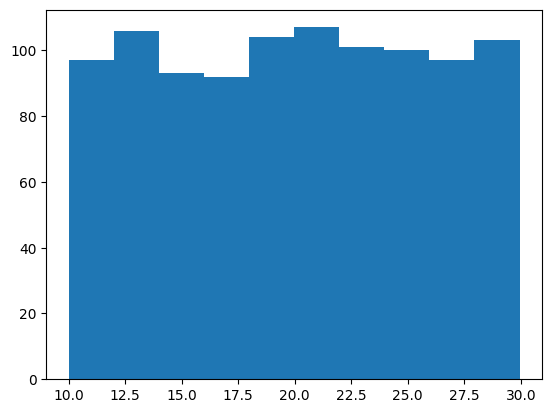

In [5]:
np.random.seed(1)  # For reproducibility

plot_histogram(sample_uniform(1000, 10, 20))
plt.savefig("../images/sampling_uniform.png", dpi=300, bbox_inches="tight")

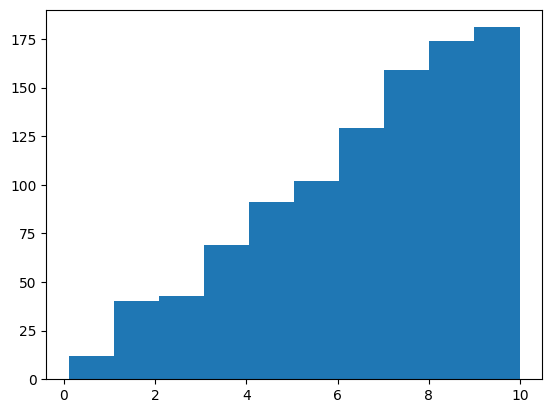

In [6]:
np.random.seed(1)  # For reproducibility

plot_histogram(sample_increasing(1000))
plt.savefig("../images/sampling_increasing.png", dpi=300, bbox_inches="tight")

### Problem 0

Try playing with the sample size and see how the histogram change with each run. Check if the result match what you think. Explain in detail.

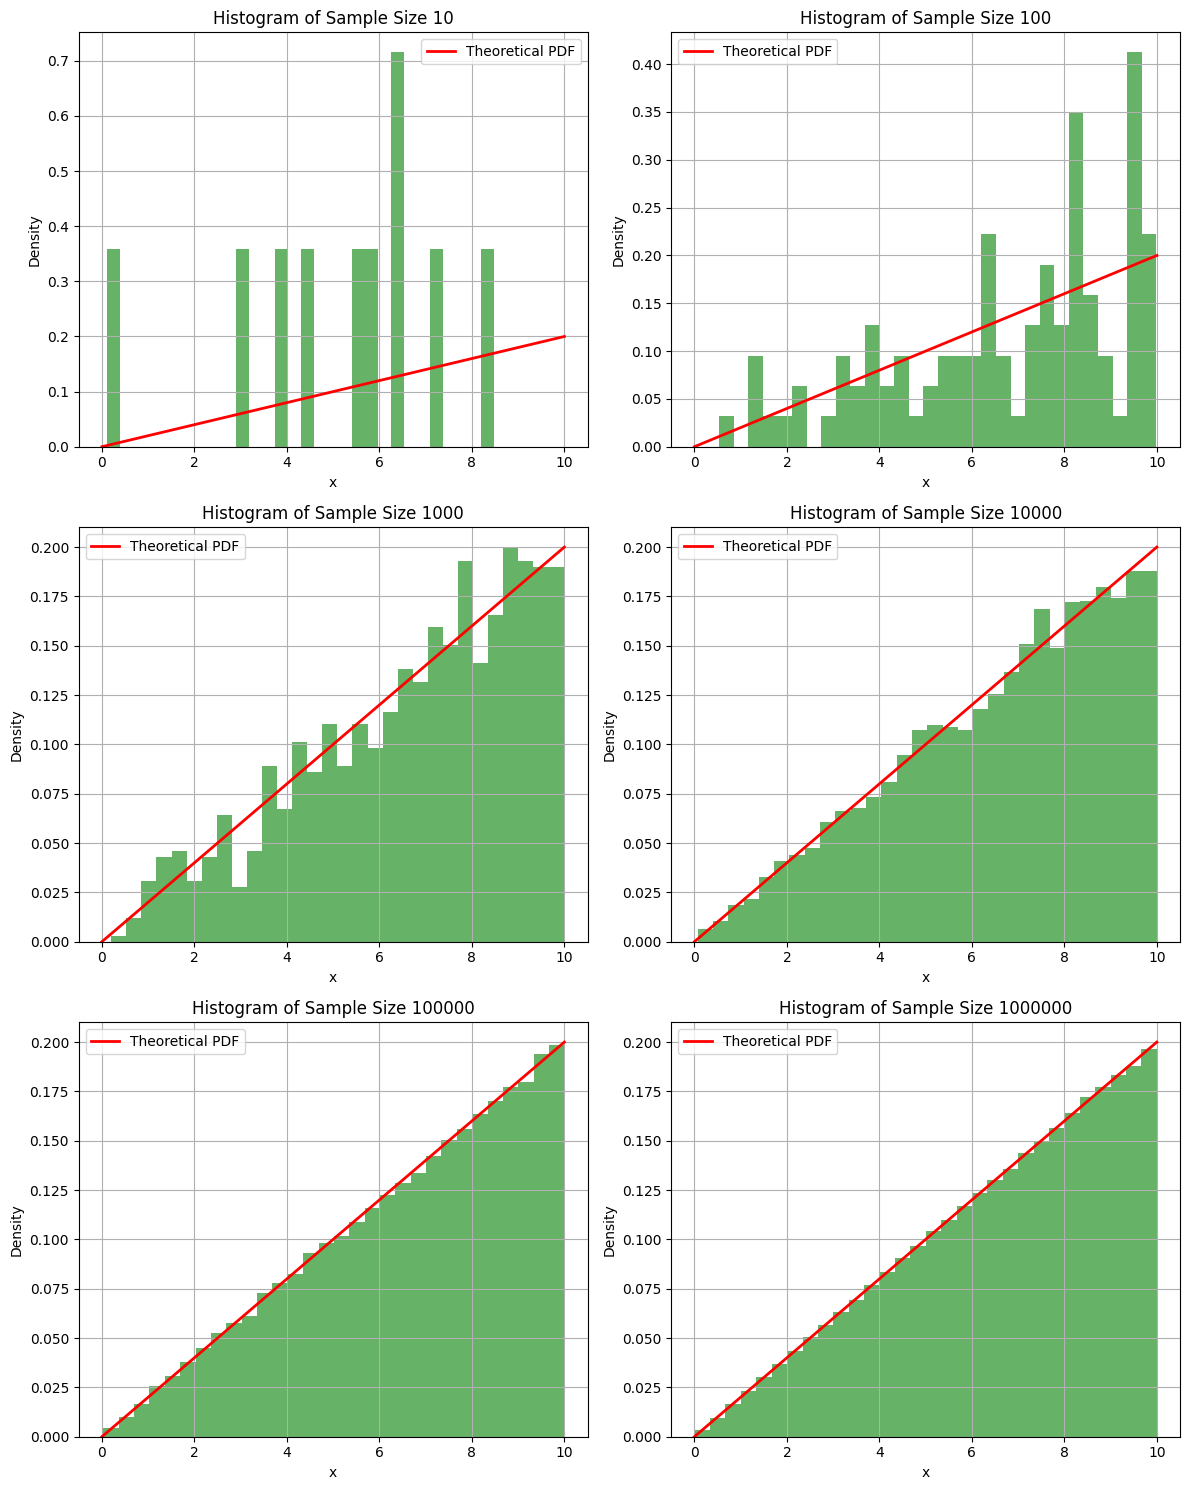

In [7]:
np.random.seed(1)  # For reproducibility

Ns = [10, 100, 1000, 10000, 100000, 1000000]

# Create a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()  # Flatten to make indexing easier

for i, N in enumerate(Ns):
    data = sample_increasing(N)
    
    # Plot histogram on the corresponding subplot
    axes[i].hist(data, bins=30, density=True, alpha=0.6, color="g")

    # Plot the theoretical PDF
    x = np.linspace(0, 10, 100)
    pdf = x / 50
    axes[i].plot(x, pdf, "r-", lw=2, label="Theoretical PDF")

    axes[i].set_title(f"Histogram of Sample Size {N}")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("Density")
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.savefig("../images/sampling_increasing_grid.png", dpi=600, bbox_inches="tight")
plt.show()

## Maximum Likelihood Estimation

### Problem 1

Machines in Hamtaro’s factory have their lifetime modelled by exponential distribution with an unknown parameter. Hamtaro found out that his machines failed after $x_1, x_2, ..., x_n$ years. Estimate the unknown parameter.

In [8]:
machine_failed_time = [2, 3, 1, 3, 4]   # In class example
# machine_failed_time = sample_exponential(5, 0.3)  # Sampled from exponential distribution

def prob1_mle(X):
  return len(X)/np.sum(X)

print("The estimated parameter is: {}".format(prob1_mle(machine_failed_time)))

The estimated parameter is: 0.38461538461538464


### Problem 2

Cappy is learning to perfectly replicate a new hat design. The number of attempts he needs follows a Geometric distribution with unknown parameter. For $n$ different designs, he failed $x_1, x_2, ..., x_n$ times before succeed. Find the MLE of the parameter.

In [9]:
X = [0, 0, 2] # In Class Example
# X = sample_geometric(10, 0.9)   # Sampled from actual geometric distribution

def prob2_mle(X):
  # [YOUR CODE HERE]
  return len(X)/np.sum(X)

print("The MLE is {}".format(prob2_mle(X)))

The MLE is 1.5


### Problem 3

Suppose our data $x_1, x_2, ..., x_n$ is randomly drawn from uniform distribution $U(a,b)$. Find MLE of $a$ and $b$.

In [10]:
X = sample_uniform(100, 60, 78)

def prob3_mle(X):
  # [YOUR CODE HERE]
  a = np.min(X)
  b = np.max(X) - a
  return a, b

a, b = prob3_mle(X)
print("The MLE is ({}, {})".format(a, b))

The MLE is (60.12826603249125, 77.77392490775028)


### Problem 4

Dexter tracks the growth of his prized sunflower over three days (day 0, 1, and 2). He believes the sunflower's height at the end of each day $y_{t+1}$ is its height from the previous day $y_t$ multiplied by a secret growth factor, $\alpha$, plus some random daily noise. For a two-day period, we can observe the following Markov process: $P(y_2, y_1, y_0 | \alpha) = P(y_2|y_1)P(y_1|y_0)P(y_0 |\alpha)$ where $ y_2 \sim \mathcal{N}(\alpha y_1, \sigma^2), y_1 \sim \mathcal{N}(\alpha y_0, \sigma^2), y_0 \sim \mathcal{N}(0,\lambda)$

Find the Maximum Likelihood Estimate (MLE) for the secret growth factor, $\alpha$, given the observed heights at the end of each day $y_2,y_1,y_0$.  In other words, compute for the value of $\alpha$ that maximizes $P(y_2,y_1,y_0|\alpha)$.

**_Solution_**

$P(y_2, y_1, y_0| \alpha) = P(y_2|y_1)P(y_1|y_0)P(y_0| \alpha)= \frac{1}{2\pi\sigma}e^{-\frac{(y_2-\alpha y_1)^2}{2\sigma^2}} \times \frac{1}{2\pi\sigma}e^{-\frac{(y_1-\alpha y_0)^2}{2\sigma^2}} \times \frac{1}{2\pi\sqrt{\lambda}}e^{-\frac{y_0^2}{2\lambda}}$

Using **log likelihood**:

$\ln(P(y_2, y_1, y_0| \alpha)) = \left[\ln(\frac{1}{2\pi\sigma}) + \left(-\frac{(y_2-\alpha y_1)^2}{2\sigma^2}\right)\right] + \left[\ln(\frac{1}{2\pi\sigma}) + \left(-\frac{(y_1-\alpha y_0)^2}{2\sigma^2}\right)\right] + \left[\ln(\frac{1}{2\pi\sqrt{\lambda}}) + \left(-\frac{y_0^2}{2\lambda}\right)\right]$

$\ln(P(y_2, y_1, y_0| \alpha)) = \left[ \ln(\frac{1}{2\pi\sigma}) + \ln(\frac{1}{2\pi\sigma}) + \ln(\frac{1}{2\pi\sqrt{\lambda}}) \right] - \frac{(y_2-\alpha y_1)^2 + (y_1-\alpha y_0)^2}{2\sigma^2} - \frac{y_0^2}{2\lambda}$

.

Thus, $\frac{\text{d}}{\text{d}\alpha}\ln(P(y_2, y_1, y_0| \alpha)) = - \frac{-2y_1(y_2-\alpha y_1) -2y_0(y_1-\alpha y_0)}{2\sigma^2} = 0$

$y_1(y_2-y_1\hat{\alpha}_{MLE}) = -y_0(y_1-y_0\hat{\alpha}_{MLE}) \implies y_1y_2 - y_1^2\hat{\alpha}_{MLE} = -y_0y_1+y_0^2\hat{\alpha}_{MLE} \implies \hat{\alpha}_{MLE}(y_1^2 + y_0^2) = y_0y_1 + y_1y_2$

Therefore: $\boxed{\implies \hat{\alpha}_{MLE} = \frac{y_0y_1 + y_1y_2}{y_1^2 + y_0^2}}$

## Maximum A Posteriori Estimation

### Problem 5

Hamtaro is trying to find acorns hidden by Boss. Boss has three favourite types of hiding sports:

- Type A – P[Acorn] = $c_a$
- Type B – P[Acorn] = $c_b$
- Type C – P[Acorn] = $c_c$

Boss has a habit to use Type A $p_a$ of the time, Type B $p_b$ of the time, and Type C $p_c$ of the time. Find the MAP estimate for finding acorns at a new spot.

In [11]:
num_spot = 3
spot_acorn_prob = [0.8, 0.5, 0.4]   # From slide
spot_select_prob = [0.4, 0.4, 0.2]  # From slide
n = 5
h = 2

In [12]:
def spot_posterior(n, h, head_prob, select_prob):
  # [YOUR CODE HERE]
  return math.comb(n, h) * ((head_prob) ** h) * ((1 - head_prob) ** (n - h)) * select_prob

p_map = 0
p_map_val = 0
for i in range(num_spot):
  posterior = spot_posterior(n, h, spot_acorn_prob[i], spot_select_prob[i])
  print("Spot {} has posterior of {}".format(i, posterior))
  if posterior > p_map_val:
    p_map_val = posterior
    p_map = spot_acorn_prob[i]

print()
print("The estimated parameter is {}".format(p_map))

Spot 0 has posterior of 0.02047999999999999
Spot 1 has posterior of 0.125
Spot 2 has posterior of 0.06912

The estimated parameter is 0.5


### Problem 6

From https://xkcd.com/1132/. Assume that chance of the sun actually explode is $10^{-6}$. What are the chance that the machine said the sun exploded when it actually isn't?

In [13]:
def calculate_posterior_prob_of_lie(sun_prior, lie_prob):
  """
  Calculates the posterior probability that the machine is lying (the event
  did not happen) given that the machine reported 'YES'.
  """
  truth_prob = 1 - lie_prob

  # P(A) - Prior probability of the event happening
  p_A = sun_prior
  # P(¬A) - Prior probability of the event NOT happening
  p_not_A = 1 - p_A

  # P(B|A) - Likelihood of machine saying 'YES' if event happened (it tells the truth)
  p_B_given_A = 1 - lie_prob
  # P(B|¬A) - Likelihood of machine saying 'YES' if event did not happen (it lies)
  p_B_given_not_A = lie_prob

  # P(B) - Total probability of the machine saying 'YES' (the evidence)
  # This is the sum of true positives and false positives.
  p_B = p_B_given_A * p_A + p_B_given_not_A * p_not_A

  # P(¬A|B) - The posterior probability we want to find.
  # This is the probability of a false positive, given a positive result.
  p_not_A_given_B = p_B_given_not_A * p_not_A / p_B
  return p_not_A_given_B

# Parameters from the problem
sun_prior = 1e-6
lie_prob = 1/36

# Calculate and print the result
chance_of_lie = calculate_posterior_prob_of_lie(sun_prior, lie_prob)
print(f"Given the machine said 'YES', the probability it's a false alarm is: {chance_of_lie:.8f}")

Given the machine said 'YES', the probability it's a false alarm is: 0.99996500


### Problem 7

Go back to problem 1-2, and try to play with input size and parameter. Observe the change in result. Explain in detail.

**Problem 1**

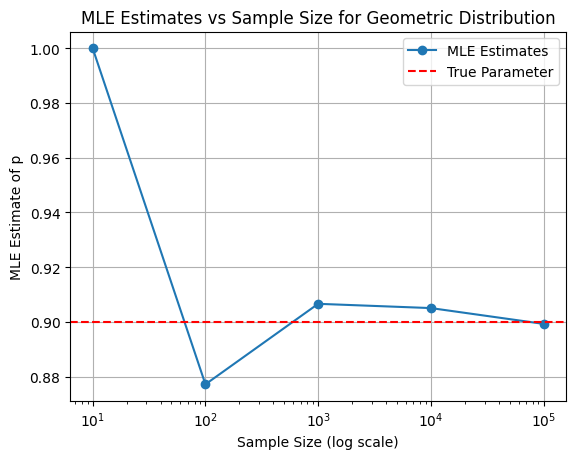

In [14]:
sample_sizes = [10, 100, 1000, 10000, 100000]
true_param = 0.9

mles = np.ndarray(len(sample_sizes))

np.random.seed(1)  # For reproducibility

for i, sample_size in enumerate(sample_sizes):
    X = sample_geometric(sample_size, true_param)
    mle = prob2_mle(X)
    mles[i] = mle

plt.plot(sample_sizes, mles, marker="o", label="MLE Estimates")
plt.axhline(y=true_param, color="r", linestyle="--", label="True Parameter")
plt.xscale("log")
plt.xlabel("Sample Size (log scale)")
plt.ylabel("MLE Estimate of p")
plt.title("MLE Estimates vs Sample Size for Geometric Distribution")
plt.legend()
plt.grid(True)

plt.savefig("../images/problem_7_1.png", dpi=300, bbox_inches="tight")

plt.show()

**Problem 2**

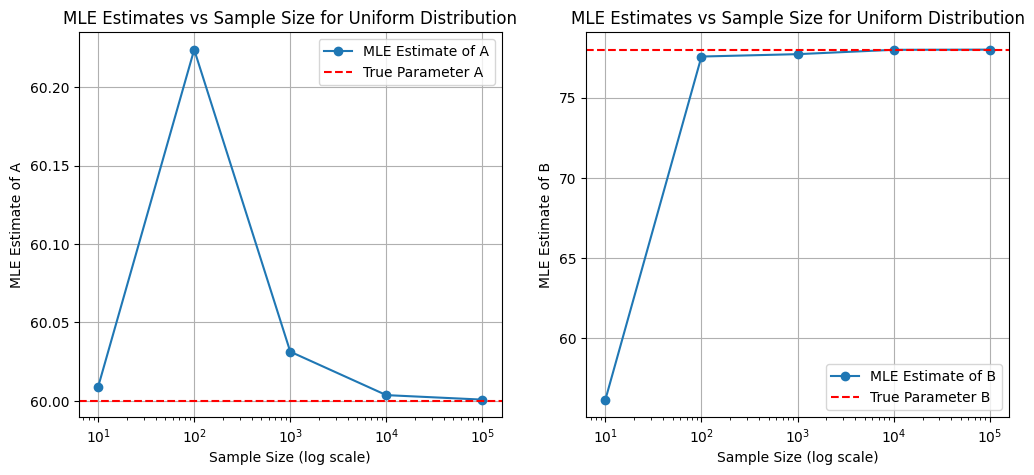

In [15]:
sample_sizes = [10, 100, 1000, 10000, 100000]
true_param_a = 60
true_param_b = 78

mles = np.ndarray((len(sample_sizes), 2))

np.random.seed(1)  # For reproducibility

for i, sample_size in enumerate(sample_sizes):
    X = sample_uniform(sample_size, true_param_a, true_param_b)
    mle = prob3_mle(X)
    mles[i] = mle

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

for i, p in enumerate(["A", "B"]):
    axes[i].plot(sample_sizes, mles[:, i], marker="o", label=f"MLE Estimate of {p}")
    axes[i].axhline(y=[true_param_a, true_param_b][i], color="r", linestyle="--", label=f"True Parameter {p}")
    axes[i].set_xscale("log")
    axes[i].set_xlabel("Sample Size (log scale)")
    axes[i].set_ylabel(f"MLE Estimate of {p}")
    axes[i].set_title("MLE Estimates vs Sample Size for Uniform Distribution")
    axes[i].legend()
    axes[i].grid(True)

plt.savefig("../images/problem_7_2.png", dpi=300, bbox_inches="tight")

plt.show()